# Differentiation by Sage

## Power fn

### Mathematical analysis

In [43]:
x, n = var('x n')
f(x,n) = x^n
df(x,n) = diff(f(x,n),x)
print(f'f(x,n)={f(x,n)}, df(x,n)={df(x,n)}')
print(f'f(x,10)={f(x,10)}, df(x,10)={df(x,10)}')

f(x,n)=x^n, df(x,n)=n*x^(n - 1)
f(x,10)=x^10, df(x,10)=10*x^9


### function code analysis

In [47]:
def f(x,n): 
    r = 1
    for m in range(n):
        r *= x
    return r

df(x) = diff(f(x,10)) 
print(f'f(x,10)={f(x,10)}, df(x,10)={df(x)}')

f(x,10)=x^10, df(x,10)=10*x^9


### symbol and condition departed analysis

In [48]:
def f(x,n,x_c,n_c): 
    r = 1
    for m in range(n_c):
        r *= x
    return r

x, n = var('x n')
df(x) = diff(f(x,n,None,10)) 
print(f'f(x,10)={f(x,n,None,10)}, df(x,10)={df(x)}')

f(x,10)=x^10, df(x,10)=10*x^9


### symbolic form code function analysis

In [50]:
def f(x,n):
    k = var('k')
    m = sum(1,k,1,n)
    return x^m

x, n = var('x n')
df(x,n) = diff(f(x,n),x) 
print(f'f(x,n)={f(x,n)}, df(x,n)={df(x,n)}')
print(f'f(x,10)={f(x,10)}, df(x,10)={df(x,10)}')

f(x,n)=x^n, df(x,n)=n*x^(n - 1)
f(x,10)=x^10, df(x,10)=10*x^9


## Further test for conditioning on main variables

In [55]:
def f(x): 
    if x < 0:
        return x^2
    else: 
        return x^3

x = var('x')
df(x) = diff(f(x),x)
print(f'f(x)={f(x)}, df(x,n)={df(x)}')

f(x)=x^3, df(x,n)=3*x^2


In [72]:
def df_true(x): 
    if x < 0:
        return 2*x
    else: 
        return 3*x^2

In [73]:
import numpy as np
import matplotlib.pyplot as plt

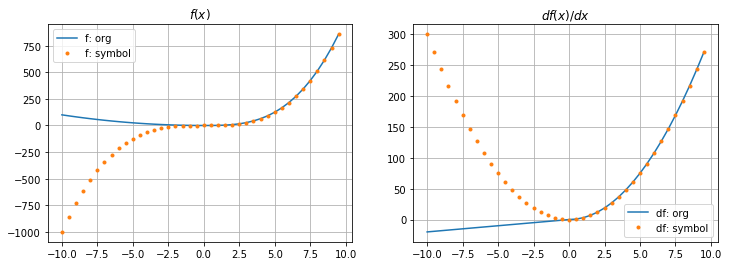

In [75]:
def plot(f, df, df_true, x_a = np.arange(-10, 10, 0.5)):
    y_fn = np.array([f(x_each) for x_each in x_a])
    y_sym = np.array([f(x)(x=x_each) for x_each in x_a])
    dy_fn = np.array([df_true(x_each) for x_each in x_a])
    dy_sym = np.array([df(x)(x=x_each) for x_each in x_a])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(x_a, y_fn, label='f: org')
    plt.plot(x_a, y_sym, '.', label='f: symbol')
    plt.grid()
    plt.legend(loc=0)
    plt.title(r'$f(x)$')

    plt.subplot(1,2,2)
    plt.plot(x_a, dy_fn, label='df: org')
    plt.plot(x_a, dy_sym, '.', label='df: symbol')
    plt.grid()
    plt.legend(loc=0)
    plt.title(r'$df(x)/dx$')
    
plot(f, df, df_true)

In [89]:
def f(x,x_c): 
    if x_c < 0:
        return x^2
    else: 
        return x^3

x = var('x')
df(x) = diff(f(x,-10),x)
print(f'x=-10: f(x)={f(x,-10)}={f(-10,-10)}, df(x)={df(x)}={df(-10)}')
df(x) = diff(f(x,10),x)
print(f'x=10: f(x)={f(x,10)}={f(10,10)}, df(x)={df(x)}={df(10)}')

x=-10: f(x)=x^2=100, df(x)=2*x=-20
x=10: f(x)=x^3=1000, df(x)=3*x^2=300


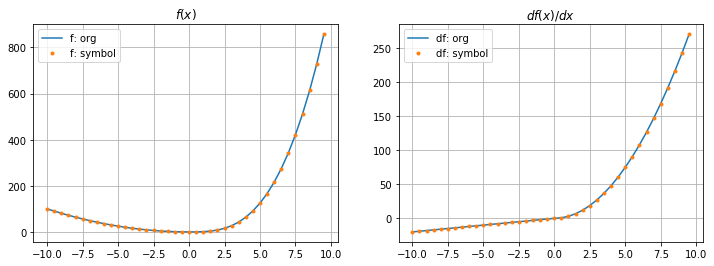

In [91]:
def plot(f, df_true, x_a = np.arange(-10, 10, 0.5)):
    y_fn = np.array([f(x_each,x_each) for x_each in x_a])
    y_sym = np.array([f(x,x_each)(x=x_each) for x_each in x_a])
    dy_fn = np.array([df_true(x_each) for x_each in x_a])
    dy_sym = np.array([diff(f(x,x_each),x)(x=x_each) for x_each in x_a])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(x_a, y_fn, label='f: org')
    plt.plot(x_a, y_sym, '.', label='f: symbol')
    plt.grid()
    plt.legend(loc=0)
    plt.title(r'$f(x)$')

    plt.subplot(1,2,2)
    plt.plot(x_a, dy_fn, label='df: org')
    plt.plot(x_a, dy_sym, '.', label='df: symbol')
    plt.grid()
    plt.legend(loc=0)
    plt.title(r'$df(x)/dx$')
    
plot(f, df_true)

# Test: New approach
- x, n을 모두 symbolic하게 처리하기는 힘들다. n=3일 경우, 코드로 구하면 x^3이 되는데 이를 다시 x^n으로 바꿀 수 없기 때문이다. n값이 정해지기 전까지는 for문을 돌릴 수 없기 때문이다. 여기서 Automatic differentiation의 파워가 나오게 된다. 이를 장점으로 받아들이는게 필요하다. 심볼릭으로 이를 해결하는 방법이 있겠지만 그건 매우 고난도이고 방법을 찾는데 오랜 시간이 걸리게 된다. 다시말해 귀납에서 연역을 끌어내는 방법이 되기 때문이다. 1+1+...+1에서 1이 n개이면 결국 n이라는 걸 AI가 알아내어야 한다. 사람은 이걸 알게 된다. 하지만 symbolic 처리는 아직 그 수준이 되지 못한다. 

## Condition based approach: conditional input

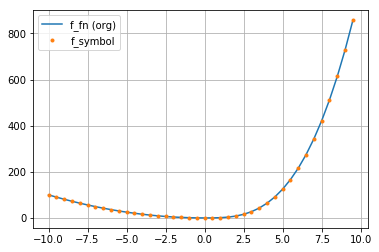

In [20]:
def f(x): 
    if x < 0:
        return x^2
    else: 
        return x^3
    
def f_symb(x_c): 
    x = var('x')
    if x_c < 0:
        return x^2
    else: 
        return x^3

x_a = np.arange(-10, 10, 0.5)
y_fn = np.array([f(x_each) for x_each in x_a])
y_sym = np.array([f_symb(x_each)(x=x_each) for x_each in x_a])

plt.plot(x_a, y_fn, label='f_fn (org)')
plt.plot(x_a, y_sym, '.', label='f_symbol')
plt.grid()
plt.legend(loc=0)

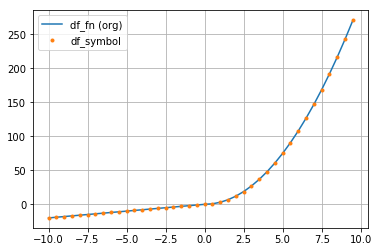

In [22]:
def df(x): 
    if x < 0:
        return 2*x
    else: 
        return 3*x^2

x_a = np.arange(-10, 10, 0.5)
dy_fn = np.array([df(x_each) for x_each in x_a])
dy_sym = np.array([diff(f_symb(x_each),x)(x=x_each) for x_each in x_a])

plt.plot(x_a, dy_fn, label='df_fn (org)')
plt.plot(x_a, dy_sym, '.', label='df_symbol')
plt.grid()
plt.legend(loc=0)

###  assume을 이용한 방법

In [101]:
def f(x): 
    if x.is_negative():
        return x^2
    else: 
        return x^3

x = var('x')
forget()
assume(x<0)    
df(x) = diff(f(x),x)
print(f'x<0: f(x)={f(x)}, df(x)={df(x)}')
forget()
assume(x>=0)    
df(x) = diff(f(x),x)
print(f'x>=0: f(x)={f(x)}, df(x)={df(x)}')

x<0: f(x)=x^2, df(x)=2*x
x>=0: f(x)=x^3, df(x)=3*x^2
